### 3.1.1. 线性回归的基本元素
通常，我们使用n来表示数据集中的样本数。 对索引为i的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$
， 其对应的标签是$y^{(i)}$
#### 3.1.1.1. 线性模型
$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$  
${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$
#### 3.1.1.2. 损失函数
$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$  
$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$  
目的:$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$
#### 3.1.1.3. 解析解
将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。 这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。 将损失关于$mathbf{w}$的导数设为0，得到解析解：$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$
#### 3.1.1.4. 随机梯度下降
$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$  
Specifically:$$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}$$

### 3.1.2. 矢量化加速

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

c:\Users\yy200\miniconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
n = 10000
a = np.ones([n])
b = np.ones([n])

In [3]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [9]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.03086 sec'

In [13]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

### 3.1.3. 正态分布与平方损失
若随机变量$x$具有均值$\mu$和方差$\sigma^(i)$（标准差$\sigma$），其正态分布概率密度函数如下：$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

In [17]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

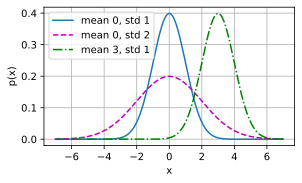

In [19]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.001)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.1.4. 从线性回归到深度网络

### 3.1.6 练习解答

---

#### 1. 假设我们有一些数据 $x_1, \dots, x_n \in \mathbb{R}$，目标是找到一个常数 $b$，使得 $\sum_i (x_i - b)^2$ 最小化

##### 1.1 找到最优值的解析解

我们的目标是最小化函数：

$$
\sum_{i=1}^n (x_i - b)^2
$$

对 $b$ 求导并令导数为 0：

$$
\frac{\partial}{\partial b} \sum_{i=1}^n (x_i - b)^2 = -2 \sum_{i=1}^n (x_i - b) = 0
$$

化简得：

$$
\sum_{i=1}^n x_i = n b
$$

解得：

$$
b = \frac{1}{n} \sum_{i=1}^n x_i
$$

即 $b$ 为数据的均值。

---

##### 1.2 这个问题及其解与正态分布有什么关系？

- 如果数据 $x_i$ 是从正态分布 $N(\mu, \sigma^2)$ 中独立采样的，则 $\mu$ 是 $x_i$ 的期望。
- 均值 $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ 是正态分布下的最大似然估计解。
- 最小化平方误差等价于最大化正态分布的似然函数。

---

#### 2. 推导出使用平方误差的线性回归优化问题的解析解

为简化问题，忽略偏置 $b$，假设数据矩阵 $\mathbf{X}$ 已添加一列全为 1 的列向量。

---

##### 2.1 用矩阵和向量表示平方误差优化问题

目标函数为：

$$
\min_{\mathbf{w}} \|\mathbf{y} - \mathbf{X} \mathbf{w}\|_2^2
$$

其中：
- $\mathbf{X}$ 是 $n \times d$ 的数据矩阵，$n$ 为样本数，$d$ 为特征数。
- $\mathbf{y}$ 是 $n \times 1$ 的目标向量。
- $\mathbf{w}$ 是 $d \times 1$ 的待优化参数向量。

---

##### 2.2 计算损失对 $\mathbf{w}$ 的梯度

对目标函数求梯度：

$$
\nabla_{\mathbf{w}} \|\mathbf{y} - \mathbf{X} \mathbf{w}\|_2^2 = -2 \mathbf{X}^\top (\mathbf{y} - \mathbf{X} \mathbf{w})
$$

令梯度为 0：

$$
\mathbf{X}^\top \mathbf{X} \mathbf{w} = \mathbf{X}^\top \mathbf{y}
$$

解得解析解：

$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

---

##### 2.3 通过将梯度设为 0，求解矩阵方程来找到解析解

解如上。需要注意的是，当 $\mathbf{X}^\top \mathbf{X}$ 不可逆时（比如 $\mathbf{X}$ 的列线性相关），解会失败。

---

##### 2.4 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

- **优点**：解析解在数据量较小且特征维度适中时表现良好，计算精度高。
- **缺点**：当数据量 $n$ 或特征维度 $d$ 非常大时，计算 $(\mathbf{X}^\top \mathbf{X})^{-1}$ 的代价过高。
- **失效情况**：当 $\mathbf{X}^\top \mathbf{X}$ 不可逆时（例如 $\mathbf{X}$ 的列线性相关），解析解不存在。

---

#### 3. 假定控制附加噪声的噪声模型是指数分布

噪声 $\epsilon$ 分布为：

$$
p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|), \quad \epsilon \in \mathbb{R}
$$

---

##### 3.1 写出模型 $-\log p(\mathbf{y} \mid \mathbf{X})$ 对数据的负对数似然

假设 $\mathbf{y} = \mathbf{X} \mathbf{w} + \epsilon$，其中 $\epsilon$ 服从上述分布。

似然函数为：

$$
p(\mathbf{y} \mid \mathbf{X}, \mathbf{w}) = \prod_{i=1}^n \frac{1}{2} \exp(-|y_i - \mathbf{x}_i^\top \mathbf{w}|)
$$

取负对数：

$$
-\log p(\mathbf{y} \mid \mathbf{X}, \mathbf{w}) = \sum_{i=1}^n |y_i - \mathbf{x}_i^\top \mathbf{w}| + C
$$

其中 $C$ 是与 $\mathbf{w}$ 无关的常数。

---

##### 3.2 尝试写出解析解

目标是最小化目标函数：

$$
\min_{\mathbf{w}} \sum_{i=1}^n |y_i - \mathbf{x}_i^\top \mathbf{w}|
$$

这是一个 **L1 损失优化问题**，通常没有解析解，需要使用优化算法（如梯度下降、坐标下降法）求解。

---

##### 3.3 提出一种随机梯度下降法来解决这个问题。哪里可能出错？

- **随机梯度下降法步骤**：
  1. 初始化参数 $\mathbf{w}$。
  2. 随机选取一个样本 $i$，计算梯度（注意 $|y_i - \mathbf{x}_i^\top \mathbf{w}|$ 的不可导点）：
     $$
     \nabla_{\mathbf{w}} |y_i - \mathbf{x}_i^\top \mathbf{w}| =
     \begin{cases}
     -\mathbf{x}_i, & \text{if } y_i - \mathbf{x}_i^\top \mathbf{w} > 0, \\
     \mathbf{x}_i, & \text{if } y_i - \mathbf{x}_i^\top \mathbf{w} < 0.
     \end{cases}
     $$
  3. 更新参数：
     $$
     \mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}}
     $$
  4. 重复迭代，直到收敛。

- **可能出错的地方**：
  - 当损失函数不可导时，梯度定义需要小心处理。
  - 如果学习率 $\eta$ 选取不当，可能导致不收敛或振荡。
  - 如果 $\mathbf{X}$ 的列线性相关，模型可能无法很好地拟合。

- **解决办法**：
  - 对不可导点采用次梯度法。
  - 选择合适的学习率衰减策略。
  - 使用正则化方法（如 $L_2$ 正则化）来缓解多重共线性问题。

---

以上是针对所有问题的详细解答，公式已用 `$$` 包围，适用于支持数学公式渲染的 Markdown 环境。